In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import textwrap
import re
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate, KFold
import pickle
from sklearn.ensemble import RandomForestRegressor
import dask.dataframe as dd

In [3]:
df=pd.read_excel(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Industrial Copper Modeling\Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# Data Cleaning & Pre Processing :

In [346]:
df.size

2543422

In [347]:
df.shape

(181673, 14)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [349]:
for col in df.columns:
    print(f"{col} : {len(df[col].unique())}")

id : 181672
item_date : 253
quantity tons : 181673
customer : 1170
country : 18
status : 10
item type : 7
application : 31
thickness : 595
width : 1386
material_ref : 16564
product_ref : 33
delivery date : 29
selling_price : 9796


In [350]:
for col in df.columns:
    print(df[col].value_counts())

id
EC06F063-9DF0-440C-8764-0B0C05A4F6AE    1
65203CB6-89D8-4BE3-ACBE-E5EDA0F5ACDC    1
3020E716-130E-4456-BD0A-57C4A519BE58    1
588AE510-4CB5-4A28-97D7-7F7A1E0BD0DD    1
15300D43-0ED4-49B2-B2CC-759D03E3EACC    1
                                       ..
679C1F30-3ABA-49F7-8B01-F50FEDD6D916    1
ACDD75A4-85DD-4E44-89E8-0E55CA952F85    1
40F88F5B-6C88-4896-81D0-DEE88A9F1C0A    1
3F6C6143-0A6D-4C87-B05E-1FC6973D173A    1
AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC    1
Name: count, Length: 181671, dtype: int64
item_date
20201202.0    2779
20210304.0    2088
20201124.0    1991
20210115.0    1928
20200929.0    1870
              ... 
20201219.0       1
20210313.0       1
20191919.0       1
20200829.0       1
19950000.0       1
Name: count, Length: 252, dtype: int64
quantity tons
54.151139     1
75.110726     1
32.431644     1
31.925345     1
132.311385    1
             ..
13.869590     1
2.738536      1
233.264013    1
11.940179     1
406.686538    1
Name: count, Length: 181673, dtype: int64
cus

In [351]:
df['material_ref'].unique()

array(['DEQ1 S460MC', '0000000000000000000000000000000000104991',
       'S0380700', ..., 'MAS65550', '4.11043_1060X5_BRE',
       '202006170005.IO.1.1'], dtype=object)

In [352]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('0000') else x)

In [353]:
df['material_ref'].unique()

array(['DEQ1 S460MC', nan, 'S0380700', ..., 'MAS65550',
       '4.11043_1060X5_BRE', '202006170005.IO.1.1'], dtype=object)

In [354]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,NaN,1668701718,20210401.0,1047.0


In [355]:
df.drop(columns=['id','material_ref'],axis=1,inplace=True)

In [356]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,20210401.0,1047.0


In [357]:
df.dtypes

item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [358]:
df.rename(columns={'delivery date':'delivery_date','item type':'item_type','quantity tons':'quantity_tons'},inplace=True)

In [359]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,20210401.0,1047.0


## Date Formatting

In [360]:
df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['delivery_date'] = pd.to_datetime(df['delivery_date'],format='%Y%m%d',errors='coerce')

In [361]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


## Null Values Checking

In [362]:
df.isna().sum()

item_date         3
quantity_tons     0
customer          1
country          28
status            2
item_type         0
application      24
thickness         1
width             0
product_ref       0
delivery_date     3
selling_price     1
dtype: int64

# Null Values Imputation

In [363]:
df['item_date'] = df['item_date'].fillna(df['item_date'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mean())
df['customer'] = df['customer'].fillna(df['customer'].mean())
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['application'] = df['application'].fillna(df['application'].mean())
df['thickness'] = df['thickness'].fillna(df['thickness'].mean())
df['delivery_date'] = df['delivery_date'].fillna(df['delivery_date'].mode()[0])
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mode()[0])

In [364]:
df.isna().sum()

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

## Data Types Conversion:

In [365]:
df.dtypes

item_date        datetime64[ns]
quantity_tons            object
customer                float64
country                 float64
status                   object
item_type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
dtype: object

In [366]:
df['quantity_tons'].unique()

array([54.15113861692779, 768.0248392021871, 386.1279489091378, ...,
       4.2355935684967845, -2000, 406.68653838450405], dtype=object)

In [367]:
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'],errors='coerce')

In [368]:
df.isna().sum()

item_date        0
quantity_tons    1
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [369]:
df['quantity_tons'] = df['quantity_tons'].fillna(df['quantity_tons'].mean())

In [370]:
df['quantity_tons'].value_counts()

quantity_tons
54.151139     1
75.110726     1
32.431644     1
31.925345     1
132.311385    1
             ..
13.869590     1
2.738536      1
233.264013    1
11.940179     1
406.686538    1
Name: count, Length: 181673, dtype: int64

In [371]:
df.dtypes

item_date        datetime64[ns]
quantity_tons           float64
customer                float64
country                 float64
status                   object
item_type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
dtype: object

In [372]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


# Descriptive Statistics

In [373]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:05.323521024,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.925754,-2000.0,10.970374,30.364989,67.161295,1000000000.0,2349074.776494
customer,181673.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.612095
country,181673.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.402334
application,181673.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.753002
thickness,181673.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:43:50.629757696,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.029527,-1160.0,669.0,812.0,953.0,100001015.0,331794.729392


# Negative to Positive values conversion

In [374]:
df['quantity_tons'] = df['quantity_tons'].apply(lambda x: np.nan if x <=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <=0 else x)

In [375]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:05.323521024,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181669.0,5875.066246,0.00001,10.971385,30.365022,67.161454,1000000000.0,2349100.637341
customer,181673.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.612095
country,181673.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.402334
application,181673.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.753002
thickness,181673.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:43:50.629757696,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181666.0,1918.118274,0.1,669.0,812.0,953.0,100001015.0,331801.121447


## Null Values Checking

In [376]:
df.isna().sum()

item_date        0
quantity_tons    4
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    7
dtype: int64

# Null values Imputation

In [377]:
df['quantity_tons'] = df['quantity_tons'].fillna(df['quantity_tons'].mean())
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mean())

In [378]:
df.isna().sum()

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

## Selection of Numerical columns:

In [379]:
num_cols = df.select_dtypes(include='number')

In [380]:
num_cols

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00
181669,208.086469,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00
181671,5875.066246,30200854.0,25.0,41.0,0.85,1250.0,164141591,601.00


In [381]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,181673.0,5.875066e+03,2.349075e+06,0.00001,1.097167e+01,3.036556e+01,6.716871e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489302e+01,2.440233e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561581e+01,1.775300e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564827e+00,6.572303e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918118e+03,3.317947e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


# Data Distribution Checking:

In [382]:
for col in num_cols:
    print(f"{col} : {(skew(df[col]))}")

quantity_tons : 424.6873098504177
customer : 86.984590056198
country : 0.7536463842839621
application : 0.7244009800031509
thickness : 303.44512882706977
width : 0.37459367901082125
product_ref : 1.0152071910463223
selling_price : 301.38559952448503


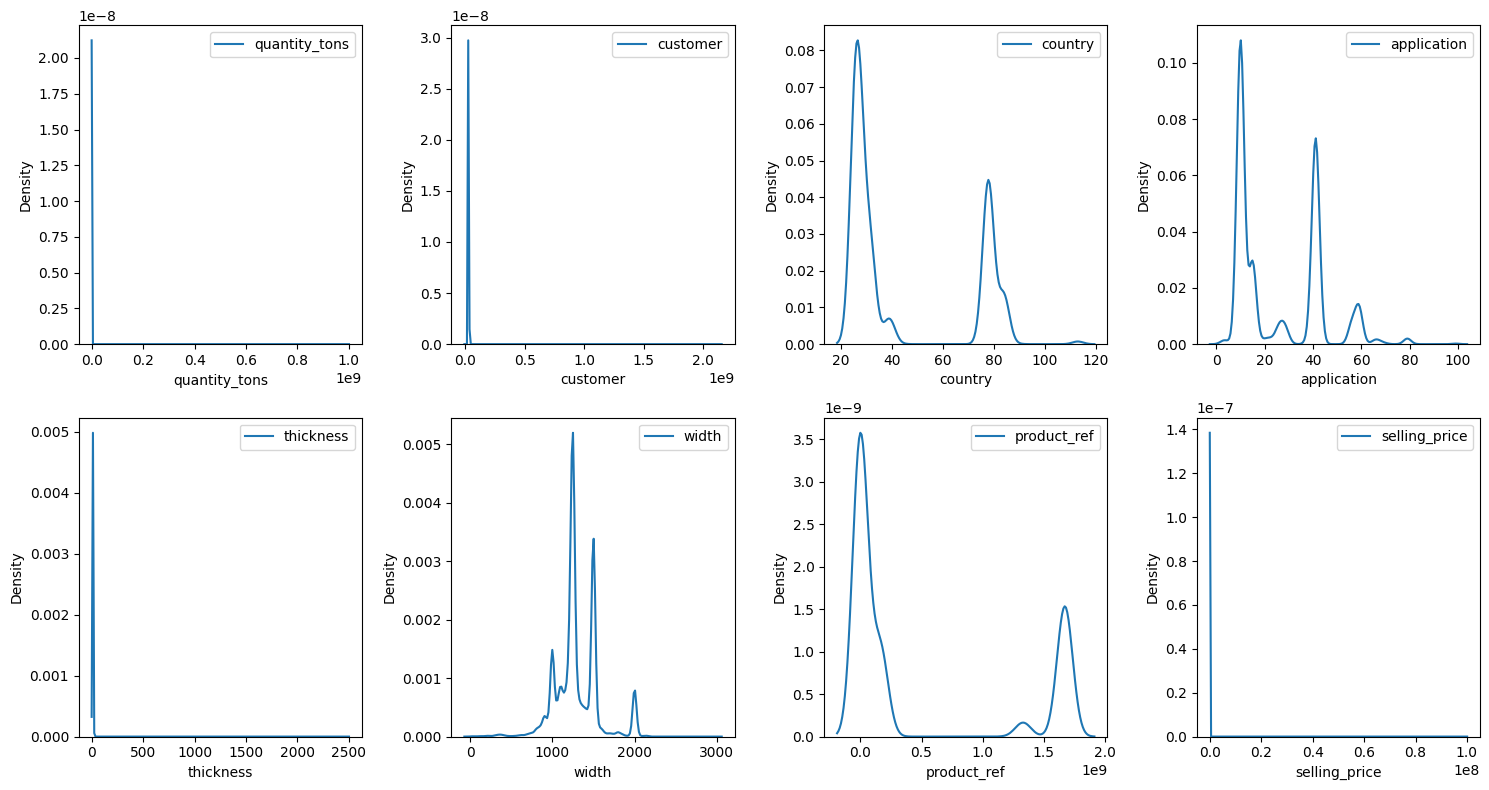

In [383]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.kdeplot(df[col], label=col)
    plt.legend()
plt.tight_layout()
plt.show()

# Data Transformation - converting skewed data into Normal distribution

# Log Transformation

In [384]:
skew_cols = ['quantity_tons', 'thickness']

In [385]:
skew_cols   

['quantity_tons', 'thickness']

In [386]:
for col in skew_cols:
    df[col] = df[col].apply(lambda x: np.log(x+1))

In [387]:
for col in skew_cols:
    print(f"{col}: {(skew(df[col]))}")

quantity_tons: 0.3395652706514445
thickness: 0.8624764776472826


# Plotting Data Distribution after Log Transformation

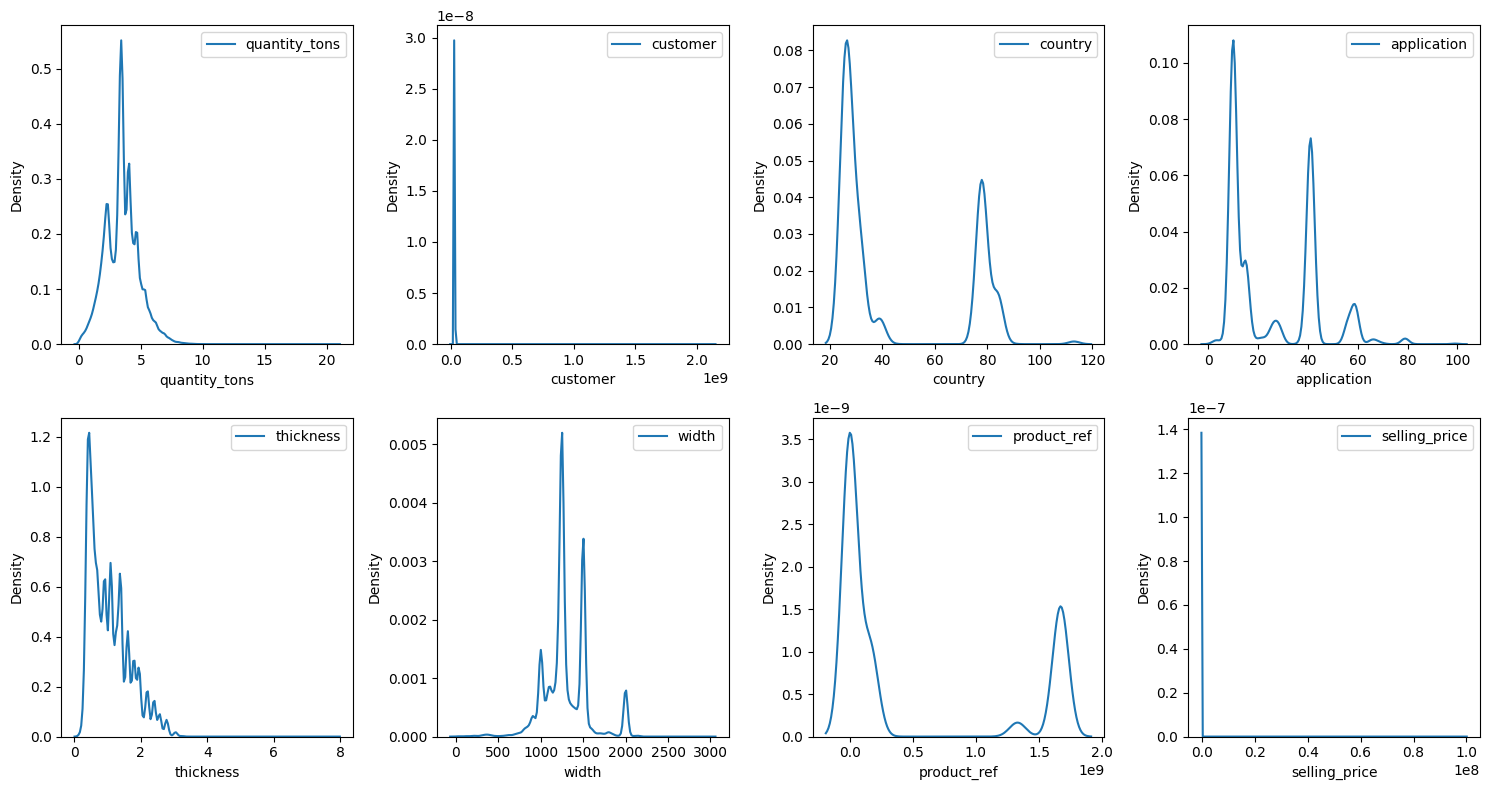

In [388]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.kdeplot(df[col], label=col)
    plt.legend()
plt.tight_layout()
plt.show()

In [389]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,4.010077,30156308.0,28.0,Won,W,10.0,1.098612,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,6.645123,30202938.0,25.0,Won,W,41.0,0.587787,1210.0,1668701718,2021-04-01,1047.0


# Outliers Removal [Applied IQR Method]

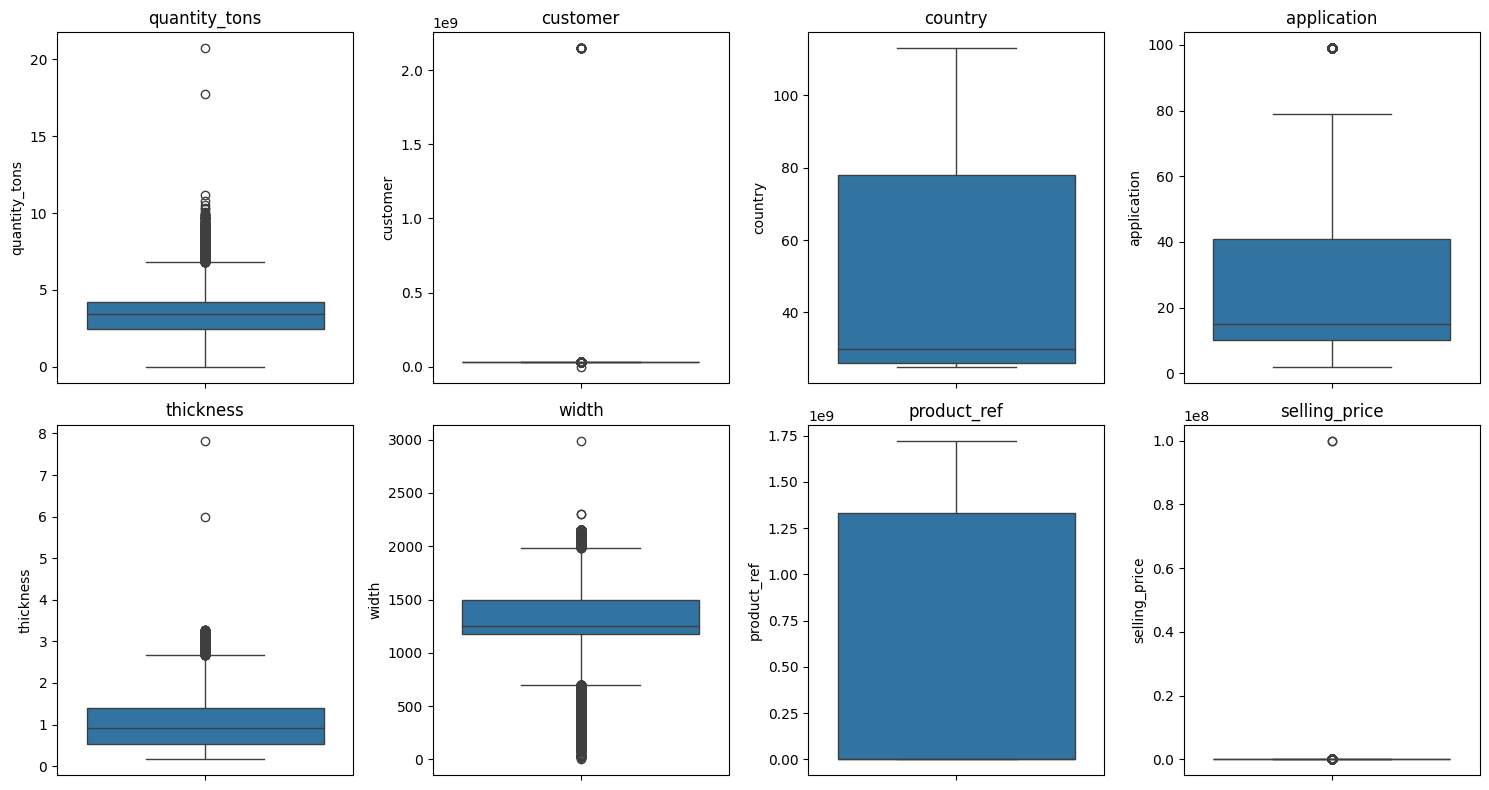

In [390]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [391]:
q2 = df['application'].median()
q1 = df[df['application']<q2]['application'].median()
q3 = df[df['application']>q2]['application'].median()
iqr = q3-q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(f"{'Upper_fence'} : {uf},{'Lower_fence'}:{lf},{'Q1'}:{q1},{'Q2'}:{q2},{'Q3'}:{q3},{'IQR'};{iqr}")

Upper_fence : 87.5,Lower_fence:-36.5,Q1:10.0,Q2:15.0,Q3:41.0,IQR;31.0


In [392]:
df[df['application']>uf].index

Index([  3309,   3311,   3313,   3315,   8104,   8108,   8112,  26683,  29497,
        29501,
       ...
       169497, 169501, 169505, 169509, 176133, 176137, 179527, 179531, 179535,
       179539],
      dtype='int64', length=146)

In [393]:
df[df['application']<lf].index

Index([], dtype='int64')

In [394]:
len(df.loc[df['application']>uf].index)

146

In [395]:
df.drop(df.loc[df['application']>uf].index,inplace=True)

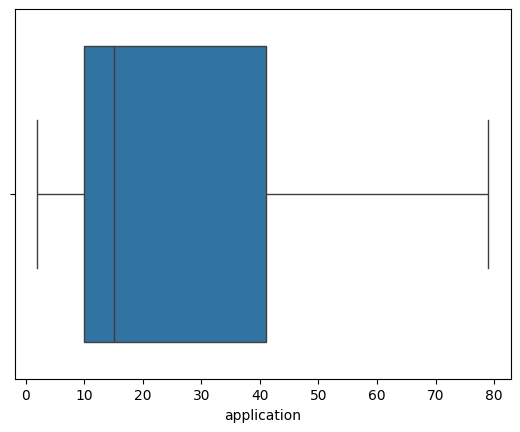

In [396]:
sns.boxplot(x=df['application'],data=df)
plt.show()

In [397]:
q1 = df['thickness'].quantile(0.25)
q3 = df['thickness'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)


0.5306282510621704 1.3862943611198906 0.8556661100577202


In [398]:
lf = q1 - 1.5*iqr
uf = q3+1.5*iqr

In [399]:
print(lf,uf)

-0.75287091402441 2.6697935262064707


In [400]:
df = df[(df['thickness']>lf) & (df['thickness']<uf)]

In [401]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,4.010077,30156308.0,28.0,Won,W,10.0,1.098612,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,6.645123,30202938.0,25.0,Won,W,41.0,0.587787,1210.0,1668701718,2021-04-01,1047.0


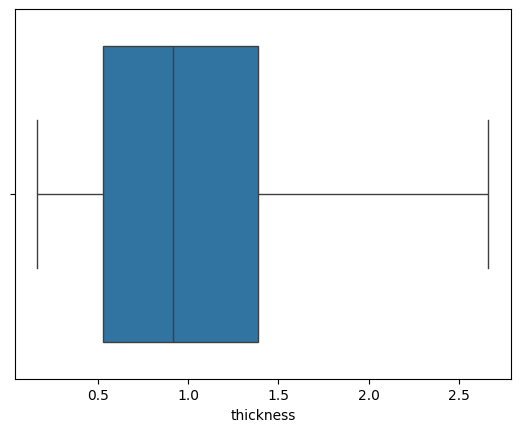

In [402]:
sns.boxplot(x=df['thickness'],data=df)
plt.show()

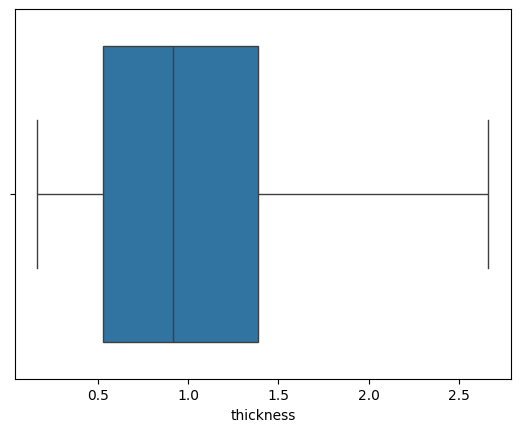

In [403]:
sns.boxplot(x=df['thickness'],data=df)
plt.show()

In [404]:
q1 = df['quantity_tons'].quantile(0.25)
q3 = df['quantity_tons'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)


2.477091324479941 4.221002144820365 1.743910820340424


In [405]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(lf,uf)

-0.1387749060306951 6.836868375331001


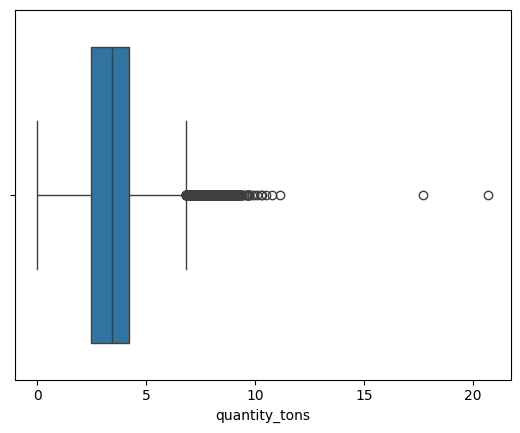

In [406]:
sns.boxplot(x=df['quantity_tons'],data=df)
plt.show()

In [407]:
df = df[(df['quantity_tons']>lf) & (df['quantity_tons']<uf)]

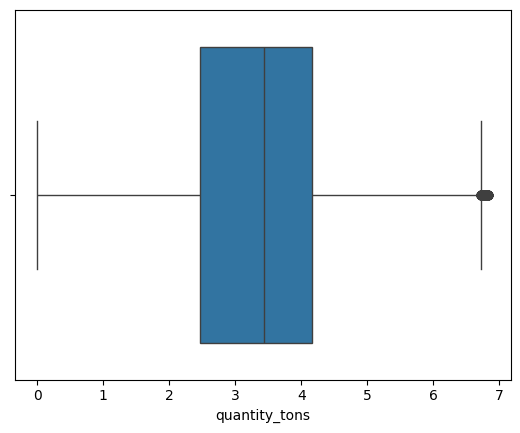

In [408]:
sns.boxplot(x=df['quantity_tons'],data=df)
plt.show()

In [409]:
df= df[df['quantity_tons']<6.5]

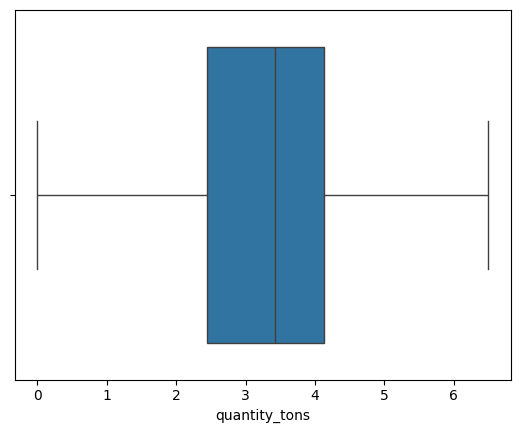

In [410]:
sns.boxplot(x=df['quantity_tons'],data=df)
plt.show()

In [411]:
q1 = df['width'].quantile(0.25)
q3 = df['width'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)


1175.0 1500.0 325.0


In [412]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(lf,uf)

687.5 1987.5


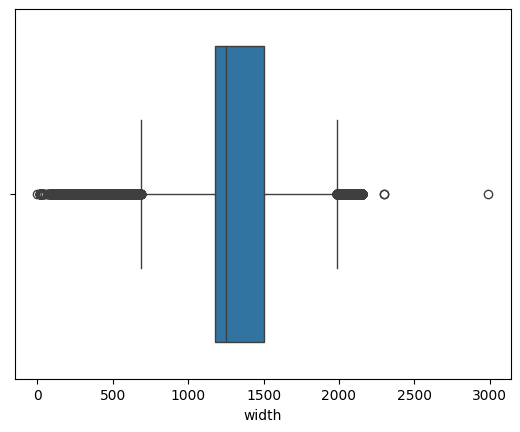

In [413]:
sns.boxplot(x=df['width'],data=df)
plt.show()

In [414]:
df = df[(df['width']>lf) & (df['width']<uf)]

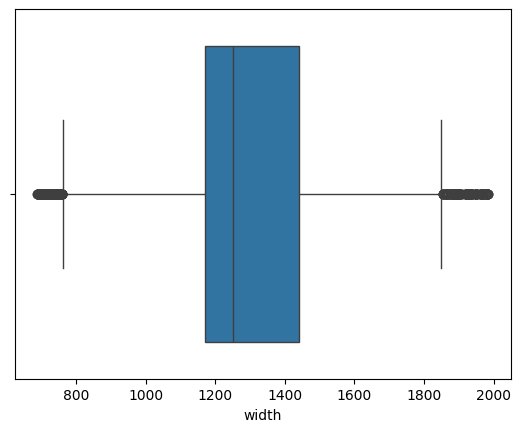

In [415]:
sns.boxplot(x=df['width'],data=df)
plt.show()

In [416]:
df = df[(df['width']>800) & (df['width']<1800)]

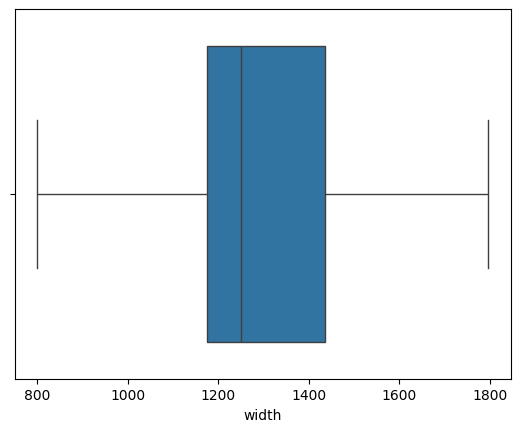

In [417]:
sns.boxplot(x=df['width'],data=df)
plt.show()

In [418]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,4.010077,30156308.0,28.0,Won,W,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00
2,2021-04-01,5.958755,30153963.0,30.0,Won,WI,28.0,0.322083,952.0,628377,2021-01-01,644.33


In [419]:
q1 = df['selling_price'].quantile(0.25)
q3 = df['selling_price'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)


678.0 964.0 286.0


In [420]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(lf,uf)

249.0 1393.0


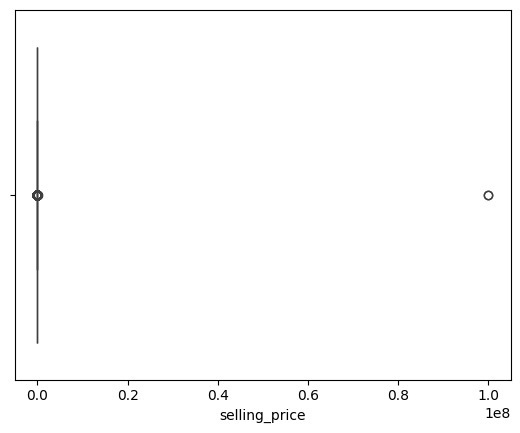

In [421]:
sns.boxplot(x=df['selling_price'],data=df)
plt.show()

In [422]:
df= df[(df['selling_price']>lf) & (df['selling_price']<uf)]

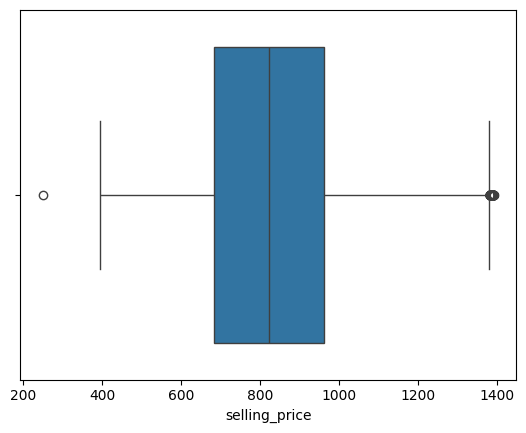

In [423]:
sns.boxplot(x=df['selling_price'],data=df)
plt.show()

In [424]:
df = df[(df['selling_price']>400) & (df['selling_price']<1300)]

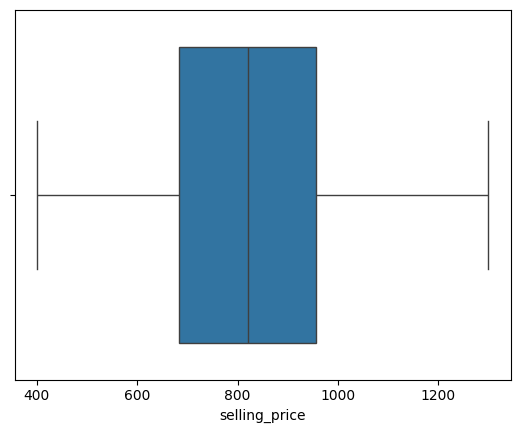

In [425]:
sns.boxplot(x=df['selling_price'],data=df)
plt.show()

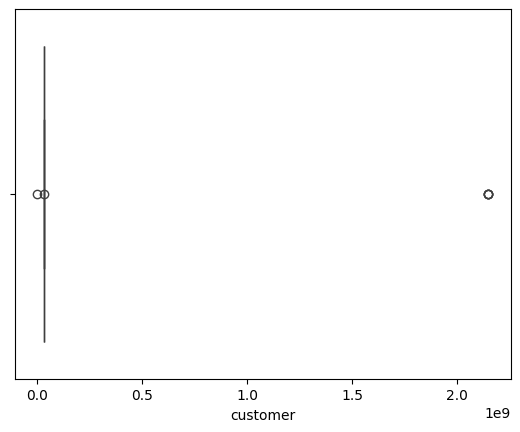

In [426]:
sns.boxplot(x=df['customer'],data=df)
plt.show()

In [427]:
q1 = df['customer'].quantile(0.25)
q3 = df['customer'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)


30166282.0 30272650.0 106368.0


In [428]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(lf,uf)

30006730.0 30432202.0


In [429]:
df = df[(df['customer']>lf) & (df['customer']<uf)]

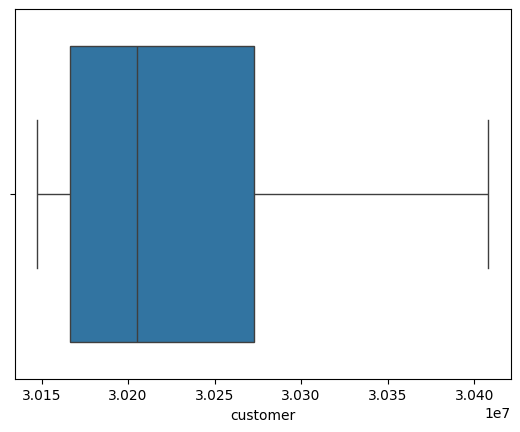

In [430]:
sns.boxplot(x=df['customer'],data=df)
plt.show()

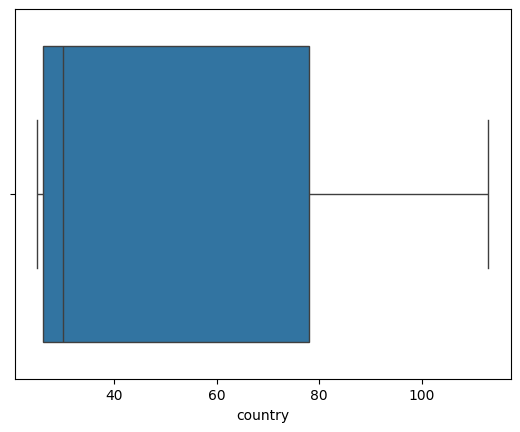

In [431]:
sns.boxplot(x=df['country'],data=df)
plt.show()

In [432]:
q1 = df['country'].quantile(0.25)
q3 = df['country'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)


26.0 78.0 52.0


In [433]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(lf,uf)

-52.0 156.0


In [434]:
df= df[(df['country']>lf) & (df['country']<uf)]

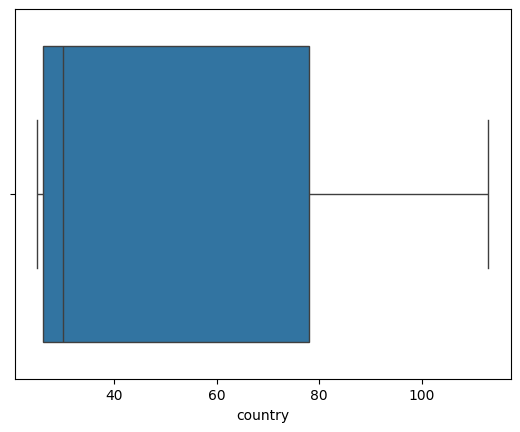

In [435]:
sns.boxplot(x=df['country'],data=df)
plt.show()

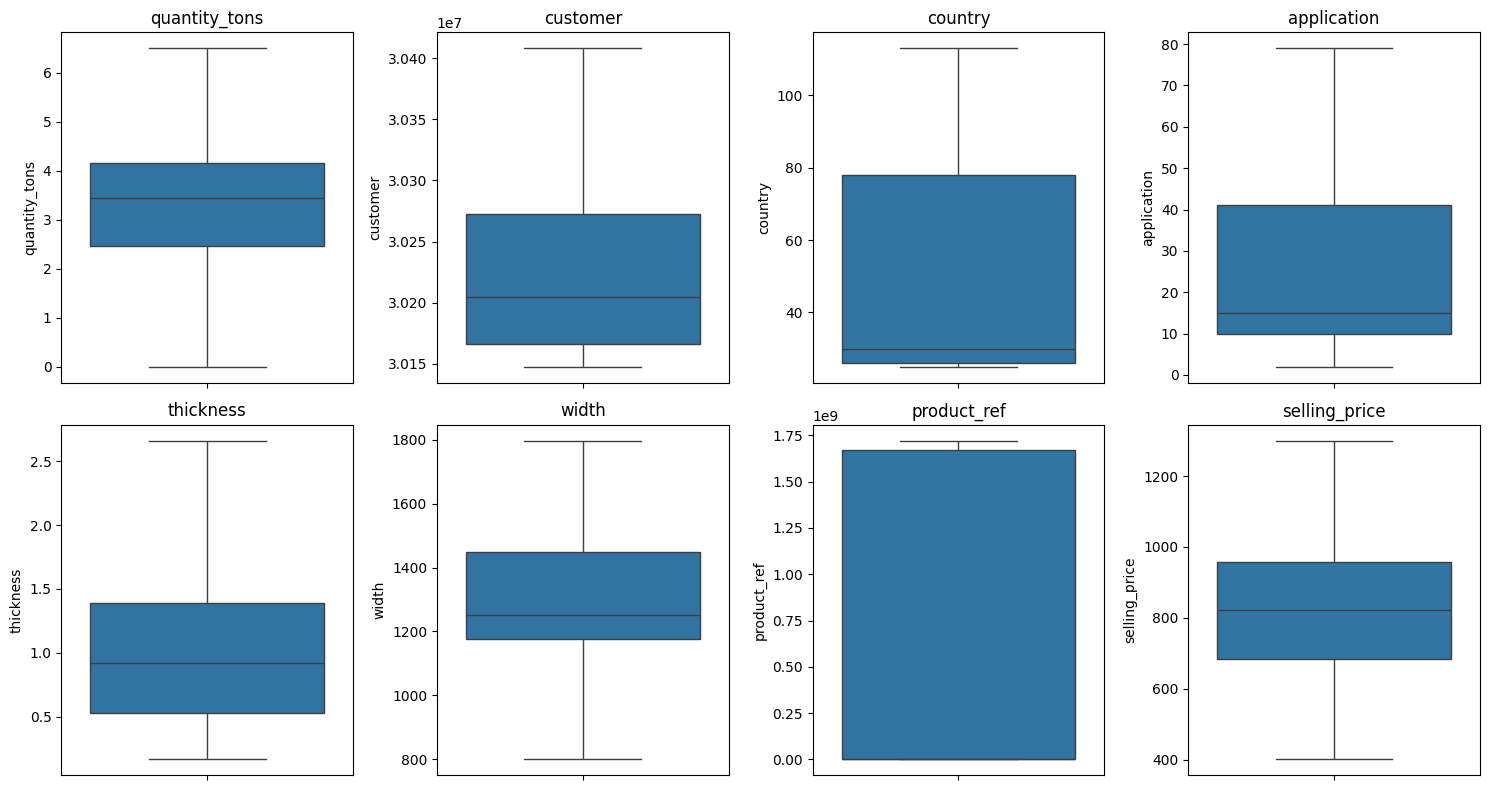

In [436]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Label Encoding 


In [438]:
cat_cols = df.select_dtypes(object)
cat_cols

,status,item_type
0,Won,W
2,Won,WI
3,Won,S
5,Won,W
7,Won,W
...,...,...
181667,Won,W
181668,Won,W
181669,Won,W
181670,Won,W


In [439]:
df['status'].unique()

array(['Won', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful',
       'Revised', 'Offered', 'Offerable'], dtype=object)

In [440]:
df['status'] = df['status'].str.lower()

In [441]:
df['status'] = df['status'].str.strip()

In [442]:
df['status'].unique()

array(['won', 'to be approved', 'lost', 'not lost for am', 'wonderful',
       'revised', 'offered', 'offerable'], dtype=object)

In [443]:
df['item_type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [444]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,4.010077,30156308.0,28.0,won,W,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00
2,2021-04-01,5.958755,30153963.0,30.0,won,WI,28.0,0.322083,952.0,628377,2021-01-01,644.33


In [445]:
df['status'] = df['status'].map({'lost':0, 'won':1, 'draft':2, 'to be approved':3, 'not lost for am':4,'wonderful':5, 'revised':6,
                          'offered':7, 'offerable':8})

In [446]:
df['status'].unique()

array([1, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [447]:
df['item_type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [448]:
df['item_type'] = df['item_type'].map({'W':5.0, 'WI':6.0, 'S':3.0, 'Others':1.0, 'PL':2.0, 'IPL':0.0, 'SLAWR':4.0})

In [449]:
df['item_type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [450]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952.0,628377,2021-01-01,644.33


## Feature Engineering : - Creation of new feature - Lead time 

In [451]:
df['lead_time'] = (df['delivery_date'] - df['item_date']).dt.days

In [452]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00,91
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952.0,628377,2021-01-01,644.33,-90


# Selling Price Prediction


In [459]:

X = df.drop(['item_date','delivery_date','selling_price'],axis=1)
y= df['selling_price']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model_r = LinearRegression()

model_r.fit (x_train,y_train)

train_pred = model_r.predict(x_train)
test_pred = model_r.predict(x_test)

print(f"Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
print(f"Coeff:{model_r.coef_}")

Train MSE : 22242.42398605644
Test MSE : 22337.205927391922
Coeff:[-8.66317576e+00  8.01864436e-05  1.20384148e-01  3.16272518e-01
  1.45364642e+01  1.39115641e+00 -1.48771182e+02  1.59694608e-02
 -1.39137571e-09  1.57921042e+00]


In [460]:

X = df.drop(['item_date','delivery_date','selling_price'],axis=1)
y= df['selling_price']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model_r = Lasso()

model_r.fit (x_train,y_train)
#df['pred'] = model_r.predict(X)


train_pred = model_r.predict(x_train)
test_pred = model_r.predict(x_test)

print(f"Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
print(f"Coeff:{model_r.coef_}")
df.head(2)

Train MSE : 22221.894421464836
Test MSE : 22441.071314800258
Coeff:[-8.60995129e+00  7.52186795e-05  1.27413545e-01  0.00000000e+00
  1.34556534e+01  1.40025907e+00 -1.45506850e+02  1.21854084e-02
 -2.09714120e-09  1.58338998e+00]


,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00,91
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952.0,628377,2021-01-01,644.33,-90


In [461]:

X = df.drop(['item_date','delivery_date','selling_price'],axis=1)
y= df['selling_price']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model_r = Ridge()

model_r.fit (x_train,y_train)

train_pred = model_r.predict(x_train)
test_pred = model_r.predict(x_test)

print(f"Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
print(f"Coeff:{model_r.coef_}")


Train MSE : 22281.827723393722
Test MSE : 22178.647218777525
Coeff:[-8.66179896e+00  8.21018031e-05  1.03527779e-01  2.25815076e-01
  1.44836096e+01  1.37204554e+00 -1.49118898e+02  1.68783681e-02
 -1.60282578e-09  1.58408654e+00]


In [463]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00,91
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952.0,628377,2021-01-01,644.33,-90


### On the all above results,the difference between Train and Test is very small.This represents that the model is performing well and not overfitting at all and generalizes  well on the unseen data.

# Saving the ML Model

In [464]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

# Loading the ML Model

In [465]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [466]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00,91
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952.0,628377,2021-01-01,644.33,-90


In [467]:
input_data = np.array([[4.010077,30156308.0,28.0,1,5.0,10,1.098612,1500.0,1670798778,91]])
sell_price_pred = regg_model.predict(input_data)
print("Predicted selling price :",sell_price_pred[0])

Predicted selling price : 843.4096137621714


In [468]:
input_data = np.array([[5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952,628377,-90]])
sell_price_pred = regg_model.predict(input_data)
print("Predicted selling price :",sell_price_pred[0])

Predicted selling price : 688.2286456167735


In [469]:
def sell_price(input_data):
    input_data_array = np.array(input_data)
    sell_price_pred = regg_model.predict(input_data)
    return("Predicted selling price :",sell_price_pred[0])
     

# Status Prediction

In [470]:
df_1 = df.copy()

In [471]:
df_1.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,1500.0,1670798778,2021-07-01,854.00,91
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,952.0,628377,2021-01-01,644.33,-90


In [472]:
df_1['status'].unique()

array([1, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [473]:
df_1['item_type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

## Scaling down values

In [474]:
df_1 = df_1[(df_1['status'] == 1) |(df_1['status'] == 0)]

## Imbalanced Data

In [475]:
df_1['status'].value_counts()

status
1    102430
0     29095
Name: count, dtype: int64

In [476]:
df_1['status'].value_counts(normalize=True) # percentage view

status
1    0.778787
0    0.221213
Name: proportion, dtype: float64

In [477]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42)

model = LogisticRegression(C= 0.01,max_iter=200,penalty='l2',solver='newton-cg',random_state=42)

model.fit(x_train,y_train)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")

Train_Accuracy :0.7898118228473674
Train_Precision : 0.7560021256493655
Train_Recall : 0.7898118228473674
Train_F1 : 0.7498747424509986
Test_Accuracy :0.7912564151302034
Test_Precision : 0.758388704975993
Test_Recall : 0.7912564151302034
Test_F1 : 0.7494253812099098


# Data is imbalanced

In [478]:
y_train.value_counts()

status
1    81944
0    23276
Name: count, dtype: int64

In [479]:
y_train.value_counts(normalize=True) # percentage view

status
1    0.778787
0    0.221213
Name: proportion, dtype: float64

Since the data is imbalanced,it has to be treated with balancing methods such as RandomOverSampler or SMOTE (Synthetic Minority Oversampling Technique)

# Applying RandomOversampler() Method

In [480]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

model = LogisticRegression(C= 0.01,max_iter=200,penalty='l2',solver='newton-cg',random_state=42)

model.fit(x_train,y_train)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")

Train_Accuracy :0.7112906375085424
Train_Precision : 0.7124579529985363
Train_Recall : 0.7112906375085424
Train_F1 : 0.7108935254432553
Test_Accuracy :0.71121741677243
Test_Precision : 0.7123528652049912
Test_Recall : 0.71121741677243
Test_F1 : 0.7108308707347153


# Balanced data is obtained after having applied RandomOverSampler() Method

In [481]:
y_train.value_counts()

status
0    81944
1    81944
Name: count, dtype: int64

In [482]:
y_train.value_counts(normalize=True) # percentage  view

status
0    0.5
1    0.5
Name: proportion, dtype: float64

# Applying SMOTE(Synthetic Minority OverSampling Method)

In [483]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

ros = SMOTE(k_neighbors=1)

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

model = LogisticRegression(C= 0.01,max_iter=200,penalty='l2',solver='newton-cg',random_state=42)

model.fit(x_train,y_train)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")

Train_Accuracy :0.711528604900908
Train_Precision : 0.7127429509597658
Train_Recall : 0.711528604900908
Train_F1 : 0.7111163647981298
Test_Accuracy :0.7104608024992678
Test_Precision : 0.7116273863488369
Test_Recall : 0.7104608024992678
Test_F1 : 0.7100612347888986


# Balanced data after application of SMOTE Method

In [484]:
y_train.value_counts()

status
1    81944
0    81944
Name: count, dtype: int64

In [485]:
y_train.value_counts(normalize=True) # percentage view

status
1    0.5
0    0.5
Name: proportion, dtype: float64

# Evaluation with 5-Fold Cross Validation

In [486]:

Log_model = LogisticRegression().fit(X, y)
cv_results = cross_validate(Log_model, X, y, cv=5, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")      
print(f"Precision : {cv_results['test_precision'].mean()}")    
print(f"Recall : {cv_results['test_recall'].mean()}")          
print(f"F1 Score : {cv_results['test_f1'].mean()}")            
print(f"ROC-AUC : {cv_results['test_roc_auc'].mean()}")        

Accuracy : 0.5535194767158058
Precision : 0.5388079885654377
Recall : 0.7390998730840574
F1 Score : 0.6231023758565394
ROC-AUC : 0.5294193457186216


# Find out the best ML Models

In [400]:

X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']


ros = SMOTE(random_state=42)

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

models = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier()]

for model in models:

    model.fit(x_train,y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    
    print(f"********{type(model).__name__}*********")
    print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
    print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
    print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
    print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")
    print()
    print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
    print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
    print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
    print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")
    print()


********LogisticRegression*********
Train_Accuracy :0.7101299305649101
Train_Precision : 0.7114087199055897
Train_Recall : 0.7101299305649101
Train_F1 : 0.7096909182107126

Test_Accuracy :0.7101885868234141
Test_Precision : 0.7114794815997558
Test_Recall : 0.7101885868234141
Test_F1 : 0.7097456504439389

********KNeighborsClassifier*********
Train_Accuracy :0.9626128167134057
Train_Precision : 0.9636824322586336
Train_Recall : 0.9626128167134057
Train_F1 : 0.9625912432263654

Test_Accuracy :0.9454812637766348
Test_Precision : 0.9473686196509024
Test_Recall : 0.9454812637766348
Test_F1 : 0.9454237022425643



In [124]:
models = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier()]

for model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
    print(f"********{type(model).__name__}*********")
    print(f"Accuracy : {cv_results['test_accuracy'].mean()}")      
    print(f"Precision : {cv_results['test_precision'].mean()}")    
    print(f"Recall : {cv_results['test_recall'].mean()}")          
    print(f"F1 Score : {cv_results['test_f1'].mean()}")            
    print(f"ROC-AUC : {cv_results['test_roc_auc'].mean()}")        


********LogisticRegression*********
Accuracy : 0.5048895489800043
Precision : 0.5283713815008296
Recall : 0.5334294993366886
F1 Score : 0.5085907982904105
ROC-AUC : 0.5207020920377488
********KNeighborsClassifier*********
Accuracy : 0.512757154101146
Precision : 0.5070191357289289
Recall : 0.9022477644073101
F1 Score : 0.6487795729080185
ROC-AUC : 0.48776521123874883
********SVC*********
Accuracy : 0.4832375622706442
Precision : 0.3901488108876232
Recall : 0.6947299294040388
F1 Score : 0.49906622681688956
ROC-AUC : 0.38838307017662216
********DecisionTreeClassifier*********
Accuracy : 0.4827940049602887
Precision : 0.4908584929051317
Recall : 0.933572939589731
F1 Score : 0.6432773383258955
ROC-AUC : 0.48279387958060277
********RandomForestClassifier*********
Accuracy : 0.48724355888998794
Precision : 0.493130131158834
Recall : 0.9436213433963647
F1 Score : 0.647537143479768
ROC-AUC : 0.6539320908920203
********AdaBoostClassifier*********
Accuracy : 0.3023594305295337
Precision : 0.3610

### KNN, Decision tree and Random Forest Algorithms are working fine and those are the best rather than other ML Models.

# Hyper parameters tuning of Selected Models:

In [950]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model = KNeighborsClassifier(n_neighbors=5)


params = {
     'weights': ['uniform','distance'],
    'leaf_size' : [30,40],
     'metric' : ['l1','l2'],
     'algorithm' : ['auto','ball_tree','kd_tree'],
    'metric_params': [None]
}

cv=GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'l1',
 'metric_params': None,
 'weights': 'distance'}

In [487]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

model = RandomForestClassifier()

model.fit(x_train,y_train)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")



Train_Accuracy :1.0
Train_Precision : 1.0
Train_Recall : 1.0
Train_F1 : 1.0
Test_Accuracy :0.9773503856292102
Test_Precision : 0.9775808254732616
Test_Recall : 0.9773503856292102
Test_F1 : 0.9773476531057256


In [488]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

model = RandomForestClassifier(n_estimators=100,criterion ='entropy',max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='log2')


model.fit(x_train,y_train)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")

Train_Accuracy :0.8881309186761691
Train_Precision : 0.8933265256212491
Train_Recall : 0.8881309186761691
Train_F1 : 0.8877602638163752
Test_Accuracy :0.8832129259006151
Test_Precision : 0.8880405695507992
Test_Recall : 0.8832129259006151
Test_F1 : 0.882848553279393


In [489]:
models = RandomForestClassifier(n_estimators=100,criterion ='entropy',max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='log2')
kf = KFold(n_splits=5,shuffle=True,random_state=42)

cv_results = cross_validate(model, X, y, cv=kf, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
print(f"********{type(model).__name__}*********")
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")      
print(f"Precision : {cv_results['test_precision'].mean()}")    
print(f"Recall : {cv_results['test_recall'].mean()}")          
print(f"F1 Score : {cv_results['test_f1'].mean()}")            
print(f"ROC-AUC : {cv_results['test_roc_auc'].mean()}")        


********RandomForestClassifier*********
Accuracy : 0.8834618764033975
Precision : 0.932466799295663
Recall : 0.8267980817296727
F1 Score : 0.8764550458861962
ROC-AUC : 0.9453261860078495


In [490]:
X = df_1.drop(['item_date','delivery_date','status'],axis=1)
y= df_1['status']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

model = KNeighborsClassifier(n_neighbors=5,algorithm='auto',leaf_size=30,metric='l1',metric_params=None,weights='distance')

model.fit(x_train,y_train)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")



Train_Accuracy :1.0
Train_Precision : 1.0
Train_Recall : 1.0
Train_F1 : 1.0
Test_Accuracy :0.956726544957532
Test_Precision : 0.957318432698934
Test_Recall : 0.956726544957532
Test_F1 : 0.9567125386788208


In [491]:
models = KNeighborsClassifier(n_neighbors=5,algorithm='auto',leaf_size=30,metric='l1',metric_params=None,weights='distance')
kf = KFold(n_splits=5,shuffle=True,random_state=42)

cv_results = cross_validate(model, X, y, cv=kf, scoring=["accuracy","precision", "recall", "f1", "roc_auc"])
print(f"********{type(model).__name__}*********")
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")      
print(f"Precision : {cv_results['test_precision'].mean()}")    
print(f"Recall : {cv_results['test_recall'].mean()}")          
print(f"F1 Score : {cv_results['test_f1'].mean()}")            
print(f"ROC-AUC : {cv_results['test_roc_auc'].mean()}")        


********KNeighborsClassifier*********
Accuracy : 0.9580689251195939
Precision : 0.9745471409797825
Recall : 0.9407002660659705
F1 Score : 0.957323312022818
ROC-AUC : 0.9845909444259139


## Saving the Model

In [492]:
with open("model.pkl","wb") as ft:
    pickle.dump(model,ft)

## Loading the Model

In [493]:
with open("model.pkl","rb") as ft:
    ml = pickle.load(ft)       


In [494]:
train_pred = ml.predict(x_train)
test_pred = ml.predict(x_test)


print(f"Train_Accuracy :{accuracy_score(y_train,train_pred)}")
print(f"Train_Precision : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_Recall : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1 : {f1_score(y_train,train_pred,average='weighted')}")

print(f"Test_Accuracy :{accuracy_score(y_test,test_pred)}")
print(f"Test_Precision : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_Recall : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_F1 : {f1_score(y_test,test_pred,average='weighted')}")

Train_Accuracy :1.0
Train_Precision : 1.0
Train_Recall : 1.0
Train_F1 : 1.0
Test_Accuracy :0.956726544957532
Test_Precision : 0.957318432698934
Test_Recall : 0.956726544957532
Test_F1 : 0.9567125386788208


In [495]:
df_1.sample(5)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
63565,2021-01-13,1.256482,30165529.0,78.0,1,5.0,10.0,0.530628,1500.0,1332077137,2021-05-01,927.0,108
137167,2020-09-28,2.352489,30229766.0,84.0,1,5.0,41.0,0.530628,1500.0,1668701718,2020-10-01,902.0,3
58075,2021-01-19,1.816109,30341127.0,84.0,1,5.0,10.0,0.530628,1000.0,164141591,2021-04-01,1007.0,72
141057,2020-09-19,3.471178,30292278.0,32.0,0,3.0,15.0,0.916291,1500.0,164141591,2021-01-01,723.0,104
46046,2021-02-02,4.610134,30165984.0,26.0,0,5.0,10.0,1.252763,1500.0,1668701718,2021-07-01,1013.0,149


In [496]:
user_data = np.array([[1.256482,30165529.0,78.0,5.0,10.0,0.530628,1500.0,1332077137,927.0,108]])
prediction = model.predict(user_data)

if prediction == 1:
    print("Won")
else:
    print("Lost")

Won


In [503]:
user_data = np.array([[4.610134,30165984.0,26.0,5.0,10.0,1.252763,1500.0,1668701718,1013.0,149]])
prediction = model.predict(user_data)

if prediction == 1:
    print("Won")
else:
    print("Lost")

Lost


In [502]:
def status_pred(user_data):
    user_data_array = np.array(user_data)
    prediction = model.predict(user_data)
    if prediction == 1:
        print("Won")
    else:
        print("Lost")

In [501]:
df_1.sample(5)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,lead_time
47290,2021-02-01,2.447923,30156496.0,28.0,1,3.0,10.0,0.916291,1100.0,1693867563,2021-04-01,954.0,59
148872,2020-09-04,5.044335,30394585.0,26.0,1,3.0,29.0,1.740466,1110.0,640665,2020-12-01,578.0,88
39151,2021-02-15,3.393603,30209830.0,27.0,1,3.0,15.0,1.098612,1250.0,640665,2021-05-01,958.0,75
515,2021-04-01,1.486510,30330352.0,78.0,1,5.0,10.0,1.098612,1000.0,1670798778,2021-07-01,993.0,91
168495,2020-07-21,2.126073,30198074.0,26.0,0,3.0,15.0,2.197225,1500.0,1671863738,2020-10-01,591.0,72


In [ ]:
'''status_encoded = {'lost':0, 'won':1, 'draft':2, 'to be approved':3, 'not lost for am':4,'wonderful':5, 'revised':6,
                          'offered':7, 'offerable':8}'''

In [ ]:
#item_type_encoded = {'W':5.0, 'WI':6.0, 'S':3.0, 'Others':1.0, 'PL':2.0, 'IPL':0.0, 'SLAWR':4.0}